# Zach's Karate Club

In this notebook we will use the Zach Karate graph to learn about graph nueral networks (GNNs), and use one to do binary classification on our graph.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from torch.nn import Linear, ReLU, Dropout
from torch_geometric.data import Dataset, download_url
from torch_geometric.nn import Sequential, GCNConv, JumpingKnowledge
from torch_geometric.nn import global_mean_pool

## EDA

In [2]:
G = nx.karate_club_graph()

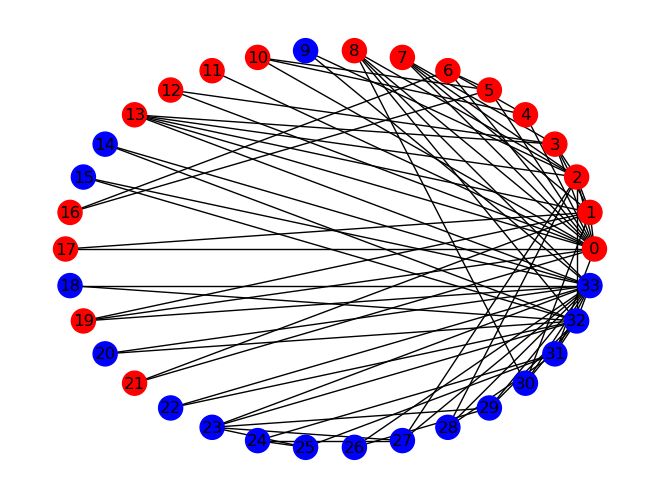

In [16]:
nx.draw_circular(G, with_labels=True, node_color=['red' if G.nodes[v]['club'] == 'Mr. Hi' else 'blue' for v in G.nodes])

In [5]:
G.nodes[0]

{'club': 'Mr. Hi'}

In [7]:
G.nodes[len(G.nodes)-1]

{'club': 'Officer'}

In [8]:
labels = [node['club'] for node in G.nodes.values()]

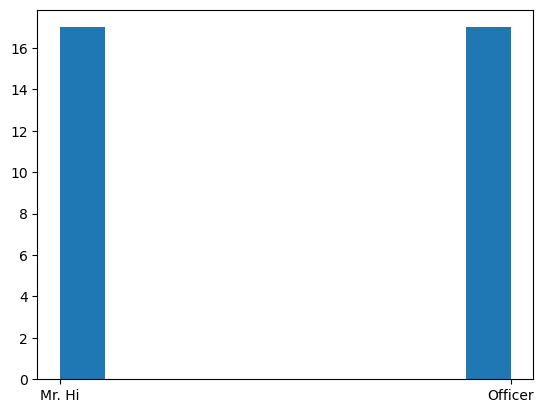

In [13]:
plt.hist(labels);

## Encoding the Nodes

In [27]:
# first we will create a pandas dataframe with the node features
edge_list = nx.to_pandas_edgelist(G)

In [28]:
edge_list.head()

,source,target,weight
0,0,1,4
1,0,2,5
2,0,3,3
3,0,4,3
4,0,5,3


In [33]:
node_features = pd.DataFrame([0 if G.nodes[n]['club'] == 'Mr. Hi' else 1 for n in G.nodes])